In [1]:
import pandas as pd

import matplotlib.pyplot as plt

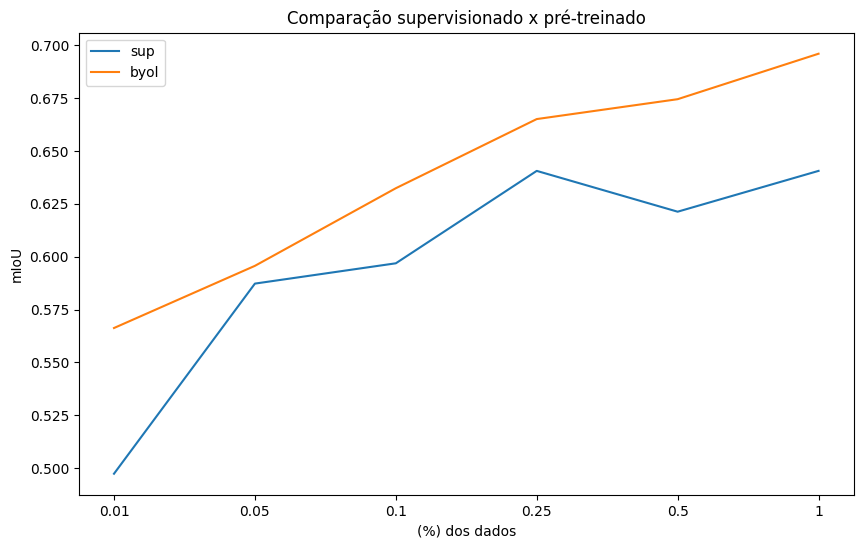

In [17]:
# Carregar os dados do arquivo CSV
df = pd.read_csv("poucos_dados.csv", index_col=0)
# Plotar os dados
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot(df.columns[:], row.values[:], label=index)
    
# Configurar o gráfico
plt.title("Comparação supervisionado x pré-treinado")
plt.xlabel("(%) dos dados")
plt.ylabel("mIoU")
plt.legend()
plt.savefig('poucos_dados.png', format='png') 
plt.show()



In [5]:
df2 = pd.read_csv("melhor_resultado.csv", index_col=0)
df2 = df2.applymap(lambda x: float(x.replace(',', '.')))
df2_transposed = df2.transpose()
df2_transposed

,sup,pre-trained
train IoU,0.9755,0.9735
val IoU,0.9551,0.9624
test IoU,0.6420,0.6855
train F1,0.9919,0.9921
val F1,0.9816,0.9883
test F1,0.9082,0.9037


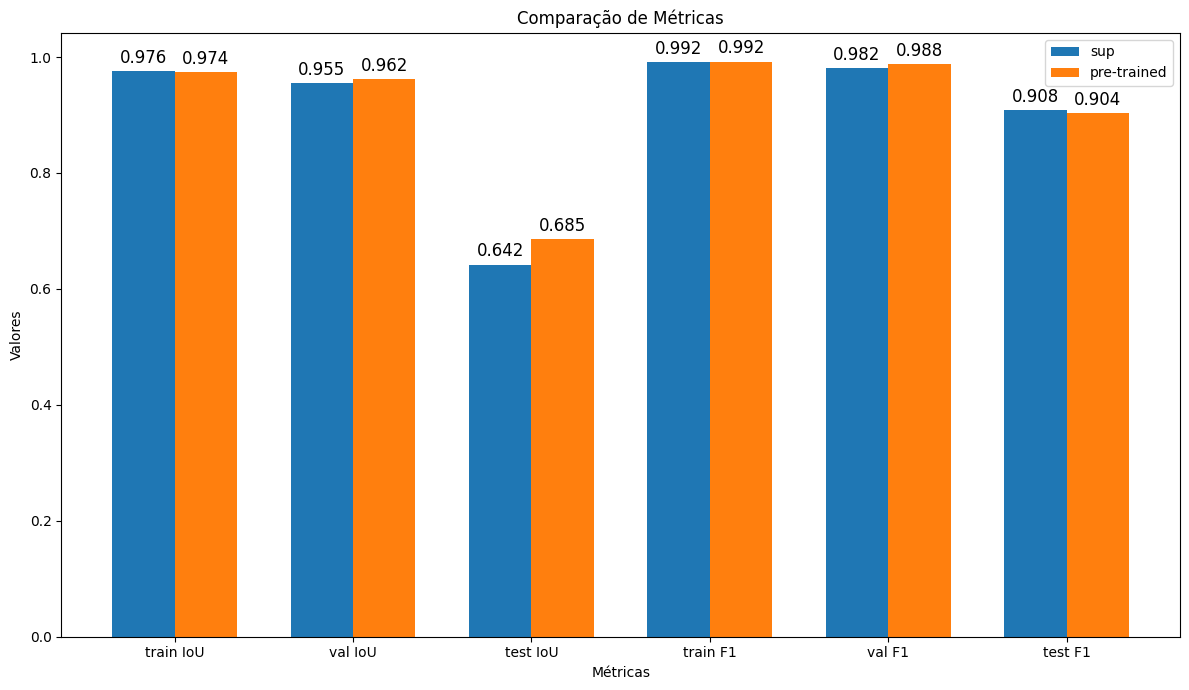

In [18]:
import numpy as np

df = df2_transposed
labels = df.index  # Obtendo os labels dos índices
sup_values = df['sup']
pre_trained_values = df['pre-trained']

x = np.arange(len(labels))  # Localização dos labels
width = 0.35  # Largura das colunas

fig, ax = plt.subplots(figsize=(12, 7))

# Gráficos de colunas
rects1 = ax.bar(x - width/2, sup_values, width, label='sup')
rects2 = ax.bar(x + width/2, pre_trained_values, width, label='pre-trained')

# Adicionando rótulos e título
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparação de Métricas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Função para adicionar valores acima das colunas
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12)

# Adicionar valores acima das colunas
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

fig.savefig('comparacao_metricas.png', format='png')
plt.show()
